In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn.cluster import KMeans 
import warnings 
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.shape

(200, 5)

In [ ]:
data.describe()

In [9]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
data.drop(columns='CustomerID',inplace = True)

In [13]:
# Normalisation
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply normalization
normalized_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Convert back to DataFrame
normalized_data = pd.DataFrame(normalized_data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

print(normalized_data)

     Annual Income (k$)  Spending Score (1-100)
0              0.000000                0.387755
1              0.000000                0.816327
2              0.008197                0.051020
3              0.008197                0.775510
4              0.016393                0.397959
..                  ...                     ...
195            0.860656                0.795918
196            0.909836                0.275510
197            0.909836                0.744898
198            1.000000                0.173469
199            1.000000                0.836735

[200 rows x 2 columns]


In [14]:
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

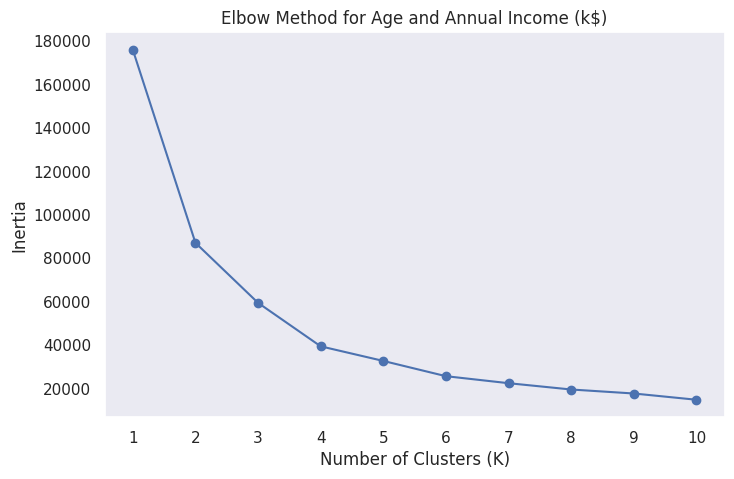

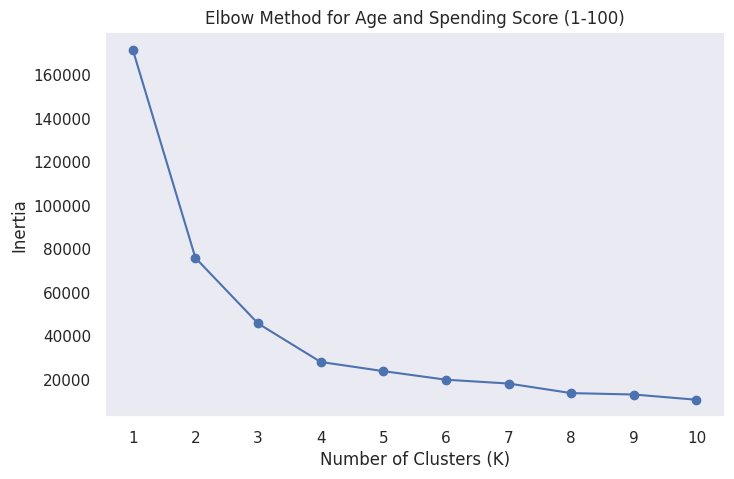

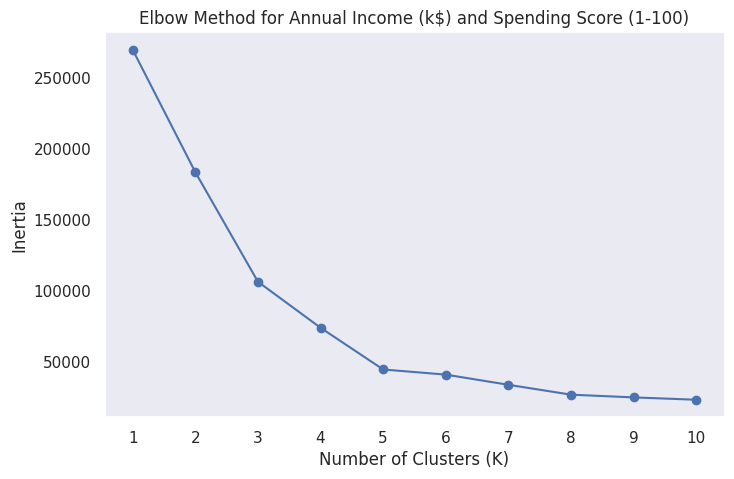

In [22]:
import plotly as py
import plotly.graph_objs as go
# Step 1: Convert Gender to numerical values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Define the feature pairs to evaluate
feature_pairs = [
    ['Age', 'Annual Income (k$)'],
    ['Age', 'Spending Score (1-100)'],
    ['Annual Income (k$)', 'Spending Score (1-100)']
]

# Step 2: Determine optimal K using Elbow Method
for features in feature_pairs:
    X = data[features]
    
    inertia = []
    K_range = range(1, 11)  # Testing K from 1 to 10
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, inertia, marker='o')
    plt.title(f'Elbow Method for {features[0]} and {features[1]}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.xticks(K_range)
    plt.grid()

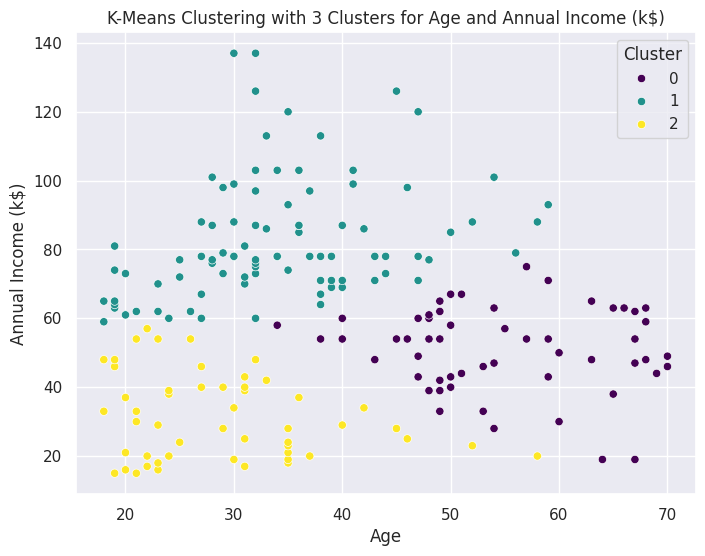

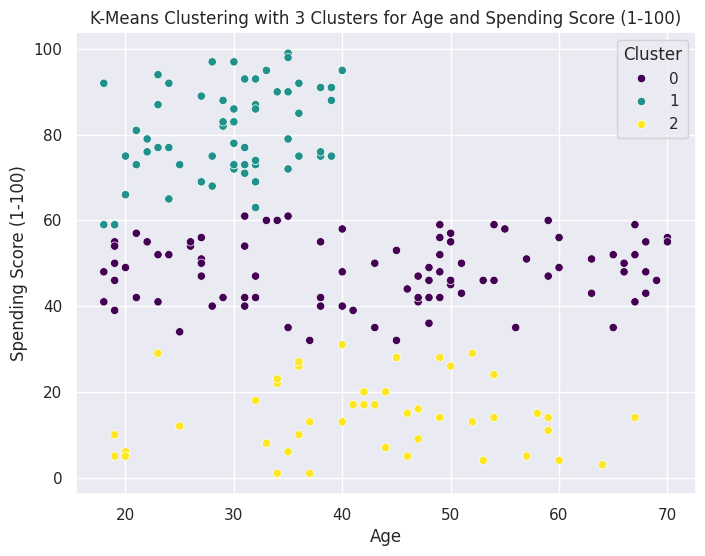

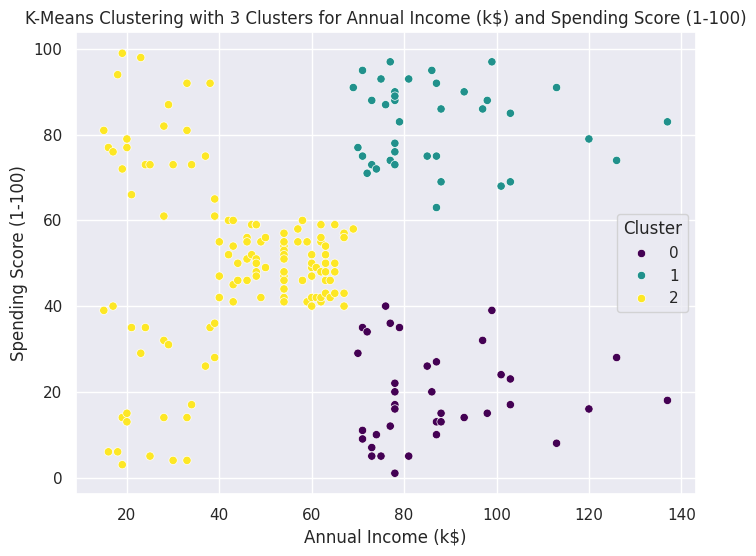

In [23]:
# Assuming the best K was determined to be 3 for demonstration purposes
best_k = 3

# Step 3: Apply K-Means with the best K for each feature pair
for features in feature_pairs:
    X = data[features]
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    data[f'Cluster_{features[0]}_{features[1]}'] = kmeans.fit_predict(X)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=features[0], y=features[1], hue=f'Cluster_{features[0]}_{features[1]}', palette='viridis')
    plt.title(f'K-Means Clustering with {best_k} Clusters for {features[0]} and {features[1]}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')

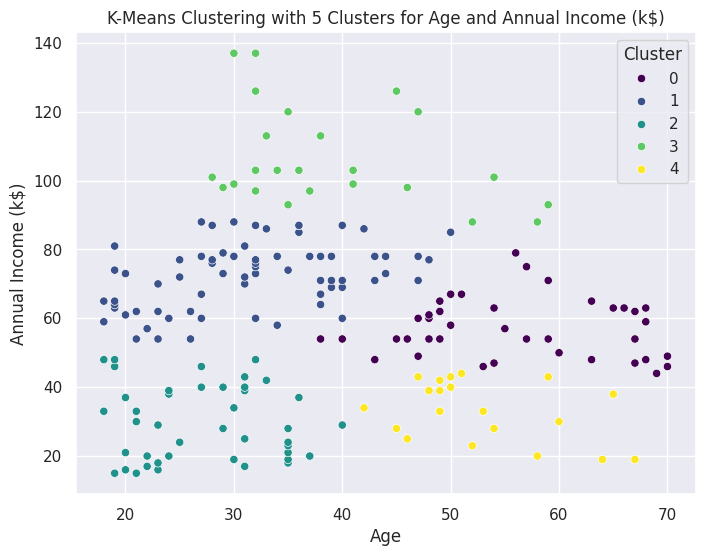

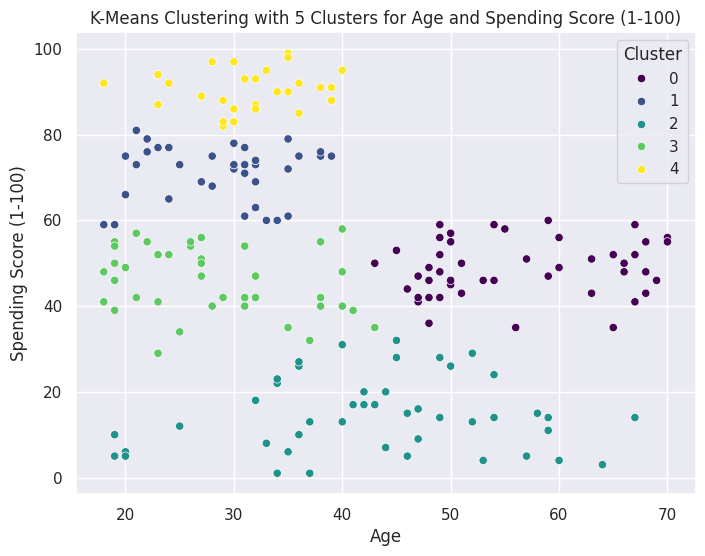

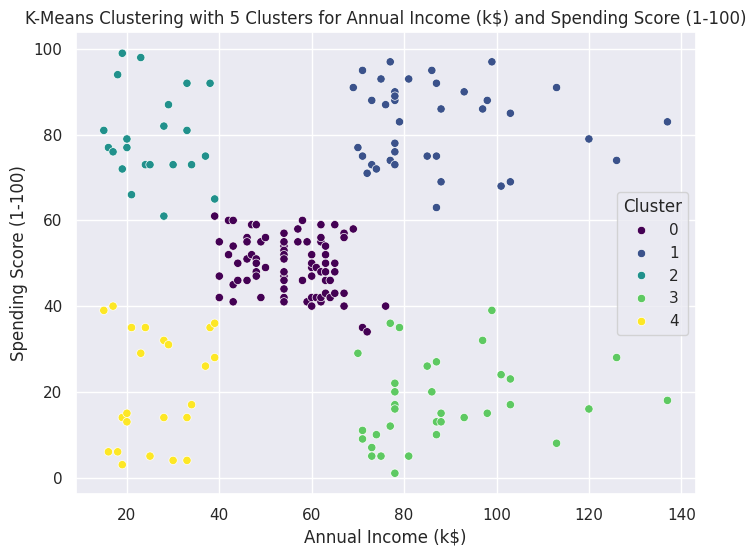

In [24]:
# Assuming the best K was determined to be 3 for demonstration purposes
best_k = 5

# Step 3: Apply K-Means with the best K for each feature pair
for features in feature_pairs:
    X = data[features]
    kmeans = KMeans(n_clusters=best_k, random_state=42)
    data[f'Cluster_{features[0]}_{features[1]}'] = kmeans.fit_predict(X)
    
    # Visualize the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=features[0], y=features[1], hue=f'Cluster_{features[0]}_{features[1]}', palette='viridis')
    plt.title(f'K-Means Clustering with {best_k} Clusters for {features[0]} and {features[1]}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend(title='Cluster')